<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/mushroom_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('mushrooms.csv')

In [6]:
# Compute basic statistics for categorical variables
summary_statistics = df.describe(include='all')
summary_statistics

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Compute mode (most frequent value) for each column
mode_values = df.mode().iloc[0]
mode_values

,0
class,e
cap-shape,x
cap-surface,y
cap-color,n
bruises,f
odor,n
gill-attachment,f
gill-spacing,c
gill-size,b
gill-color,b


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


<ipython-input-11-1302ff6bc669>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col], palette="husl", ax=axes[i])
<ipython-input-11-1302ff6bc669>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col], palette="husl", ax=axes[i])
<ipython-input-11-1302ff6bc669>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col], palette="husl", ax=axes[i])
<ipython-input-11-1302ff6bc669>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

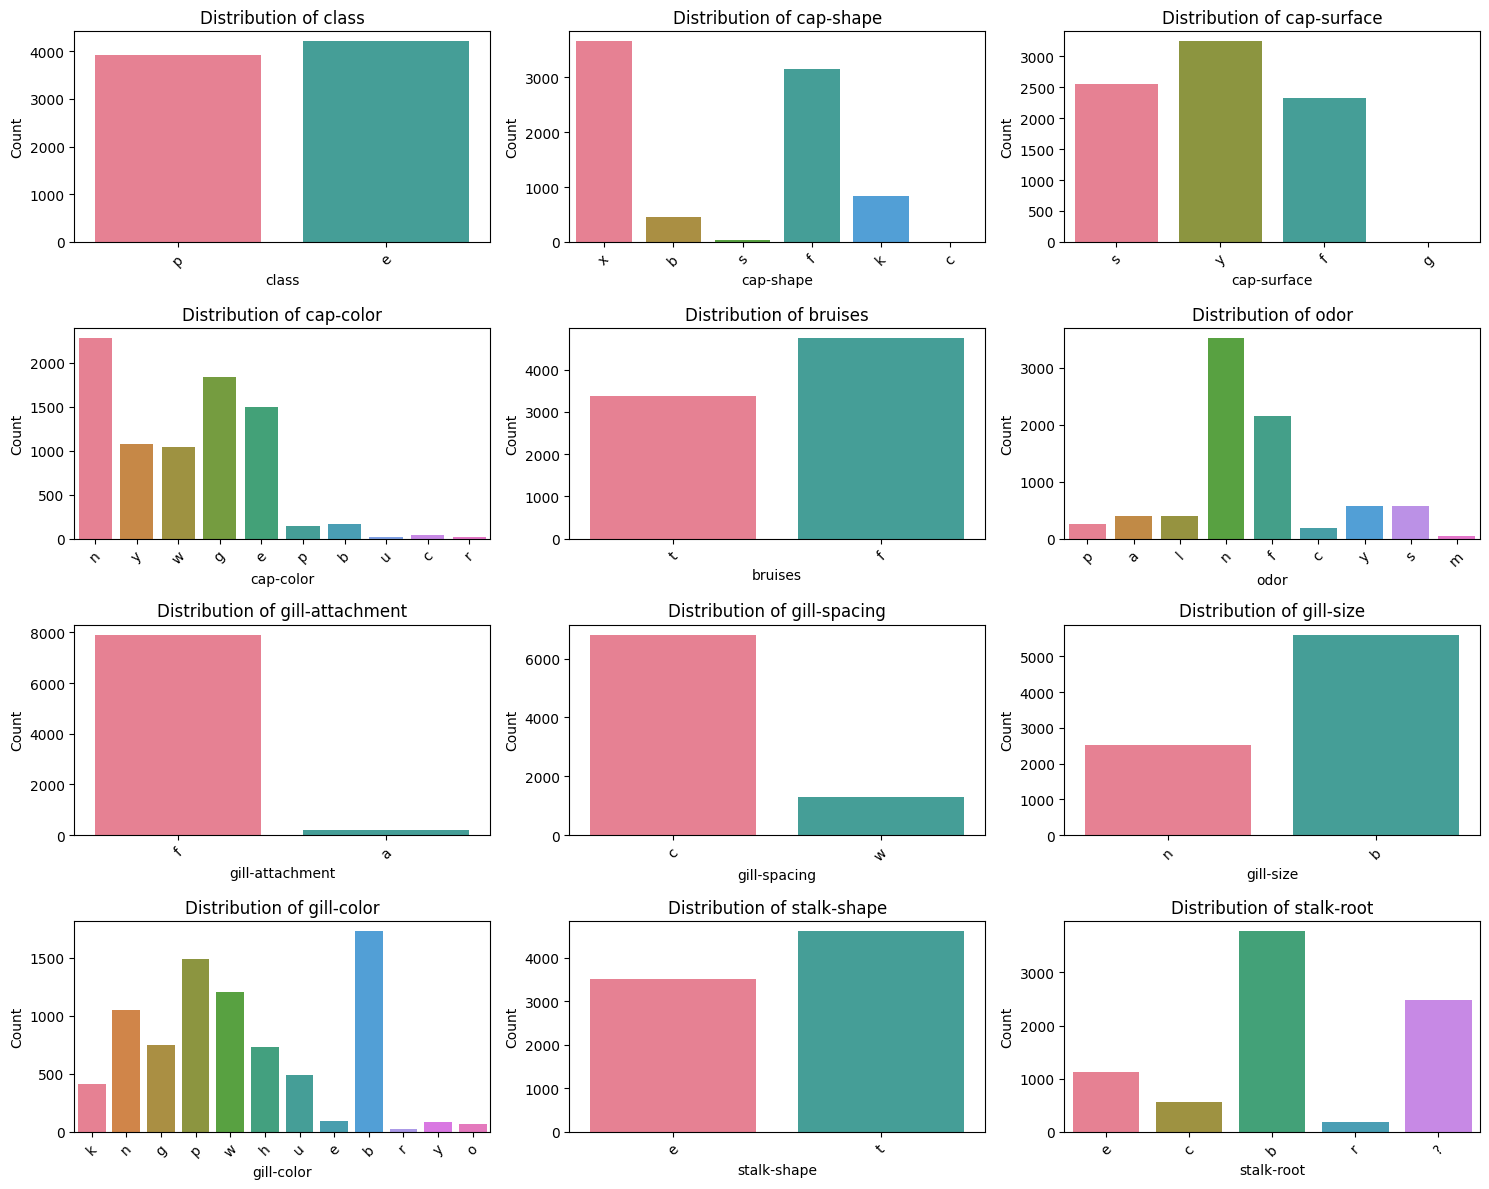

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(dataframe, columns, rows=4, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.countplot(x=dataframe[col], palette="husl", ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
  # Select categorical columns to plot
categorical_columns = df.columns[:12]  # First 12 columns for better visibility

# Plot histograms
plot_histograms(df, categorical_columns)

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-input-25-491addf3ac65>:11: RuntimeWarning:

invalid value encountered in divide

<ipython-i

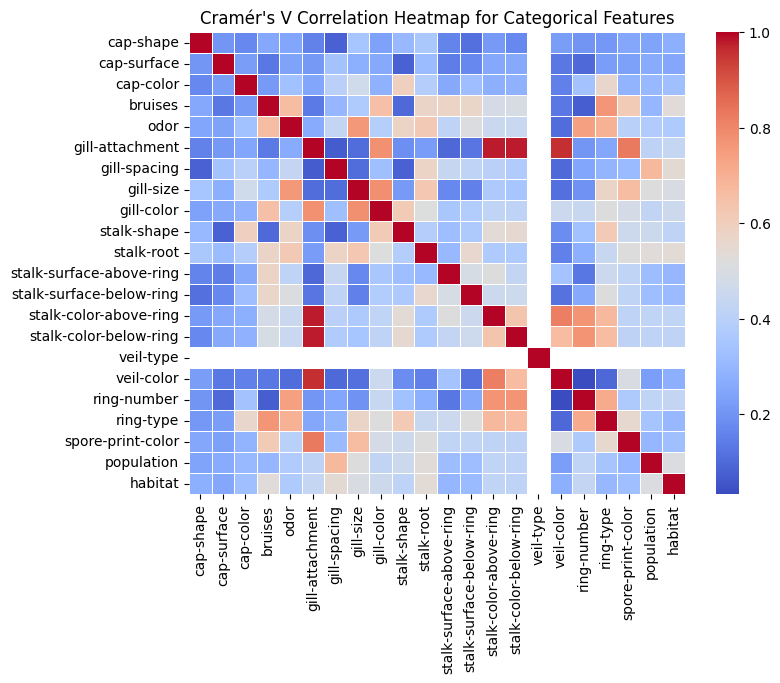

In [25]:
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate Cramér's V for categorical features
def cramers_v(x, y):
    """Calculate Cramér's V for categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute correlation matrix for categorical features
categorical_columns = df.columns[1:]  # Exclude 'class' column
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # Diagonal = 1
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

correlation_matrix = correlation_matrix.astype(float)  # Convert to float

# Heatmap of categorical feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap for Categorical Features")
plt.show()


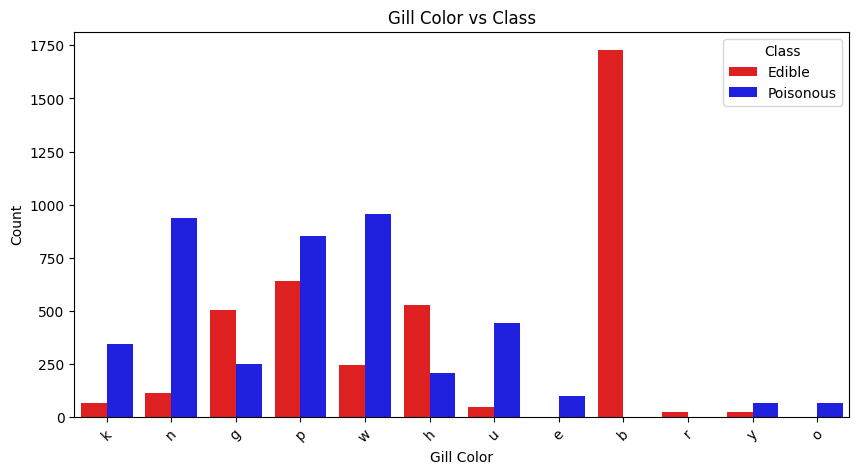

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for edible (blue) and poisonous (red)
custom_palette = {"e": "blue", "p": "red"}

# Plot Gill-Color vs. Class
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gill-color', hue='class', palette=custom_palette)
plt.title('Gill Color vs Class')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


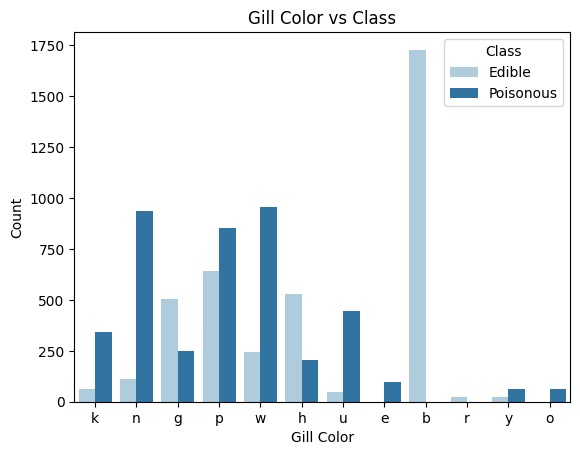

In [15]:
# Plotting gill-color vs. class
sns.countplot(data=df, x='gill-color', hue='class', palette='Paired')
plt.title('Gill Color vs Class')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

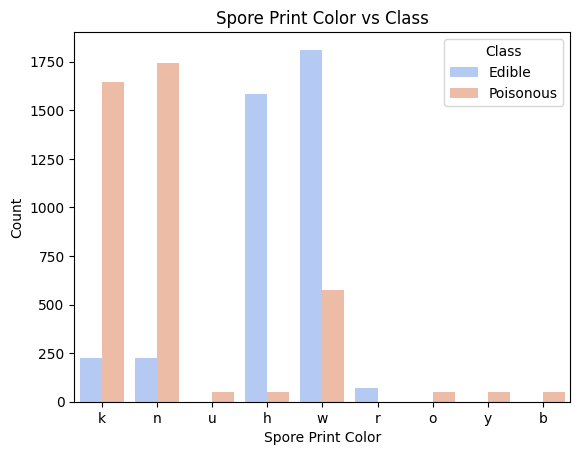

In [16]:
# Plotting spore-print-color vs. class
sns.countplot(data=df, x='spore-print-color', hue='class', palette='coolwarm')
plt.title('Spore Print Color vs Class')
plt.xlabel('Spore Print Color')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()



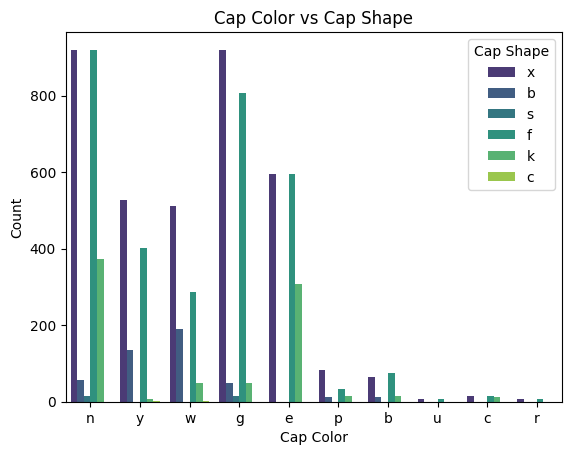

In [17]:
# Plot cap-color vs cap-shape
sns.countplot(data=df, x='cap-color', hue='cap-shape', palette='viridis')
plt.title('Cap Color vs Cap Shape')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.legend(title='Cap Shape')
plt.show()



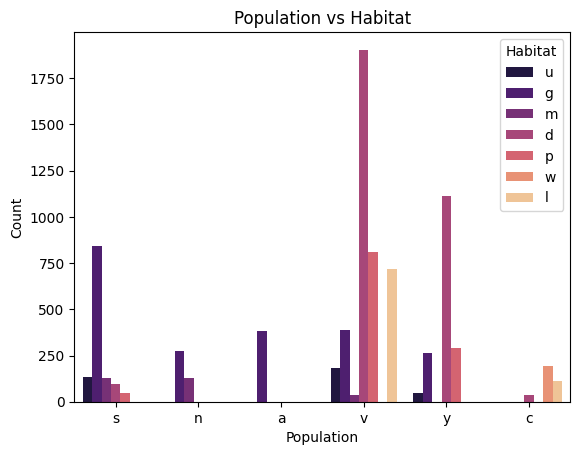

In [18]:
# Plot population vs habitat
sns.countplot(data=df, x='population', hue='habitat', palette='magma')
plt.title('Population vs Habitat')
plt.xlabel('Population')
plt.ylabel('Count')
plt.legend(title='Habitat')
plt.show()

In [22]:
import plotly.express as px
import pandas as pd

# Load the dataset
mushrooms_df = pd.read_csv("mushrooms.csv")

# Iterate over all features (except `class`) to create bar charts
features = mushrooms_df.columns.drop("class")  # Exclude target variable
figs = []  # Store individual figures

for feature in features:
    fig = px.histogram(
        mushrooms_df,
        x=feature,
        color="class",
        barmode="group",
        title=f"{feature} vs Class",
        labels={"count": "Count", feature: feature, "class": "Class"},
        color_discrete_map={"e": "blue", "p": "red"}  # Optional: color mapping for classes
    )
    fig.update_layout(xaxis_title=feature, yaxis_title="Count", legend_title="Class")
    figs.append(fig)

# Display the first figure as an example
figs[0].show()

# Optional: Display all figures sequentially
for fig in figs:
    fig.show()


In [23]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Convert categorical data to numerical using Label Encoding
label_encoder = LabelEncoder()
encoded_df = mushrooms_df.apply(label_encoder.fit_transform)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Create a heatmap using Plotly
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale="Viridis",
    title="Correlation Heatmap of Mushroom Features",
    labels={"color": "Correlation"},
)

fig.update_layout(margin=dict(l=40, r=40, t=40, b=40))
fig.show()


In [27]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Loading the dataset.
mushrooms_df = pd.read_csv('mushrooms.csv')

# Encoding categorical features.
label_encoder = LabelEncoder()
for column in mushrooms_df.columns:
    mushrooms_df[column] = label_encoder.fit_transform(mushrooms_df[column])

# Spliting data into features (X) and target (y)
X = mushrooms_df.drop('class', axis=1)
y = mushrooms_df['class']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Evaluate models
results = []

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    # Prediction on the test set
    y_pred = model.predict(X_test)
    # Calculating metrics values
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Appending the results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Converting results to a DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Gaussian Naive Bayes,0.921846,0.909887,0.929668,0.919671
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.947692,0.943949,0.947570,0.945756
4,SVC,0.992615,0.998705,0.985934,0.992278
5,KNN,0.996308,0.992386,1.000000,0.996178
6,XGBoost,1.000000,1.000000,1.000000,1.000000


                  Model  Accuracy  Precision    Recall  F1-Score
0  Gaussian Naive Bayes  0.921846   0.909887  0.929668  0.919671
1         Random Forest  1.000000   1.000000  1.000000  1.000000
2         Decision Tree  1.000000   1.000000  1.000000  1.000000
3   Logistic Regression  0.947692   0.943949  0.947570  0.945756
4                   SVC  0.992615   0.998705  0.985934  0.992278
5                   KNN  0.996308   0.992386  1.000000  0.996178
6               XGBoost  1.000000   1.000000  1.000000  1.000000


<ipython-input-28-8ee2f3c6c7e1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




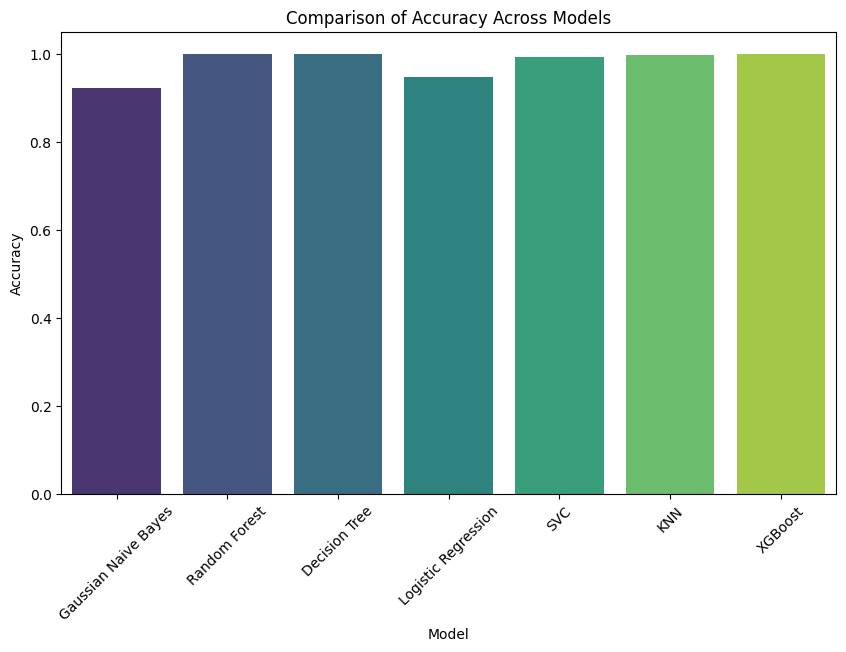

<ipython-input-28-8ee2f3c6c7e1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




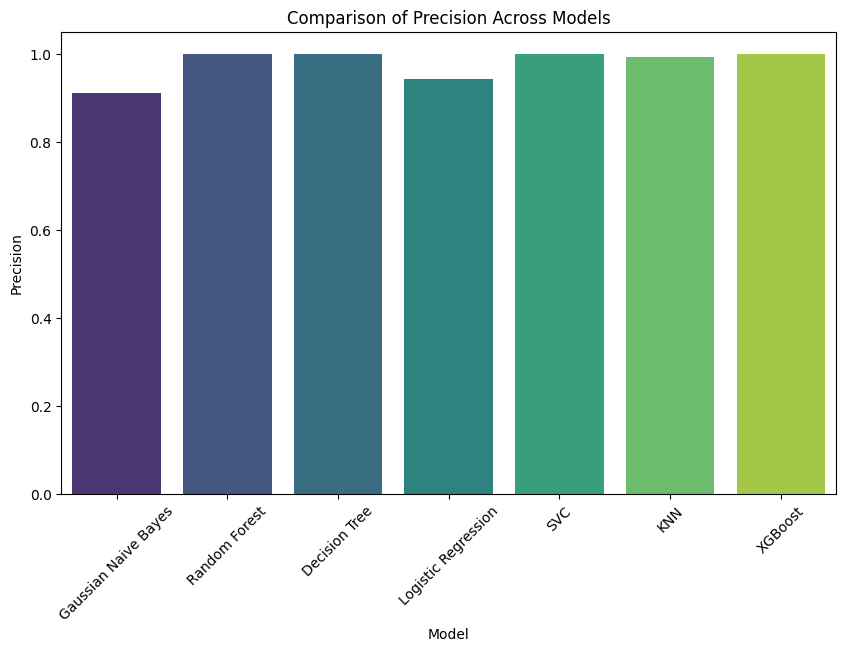

<ipython-input-28-8ee2f3c6c7e1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




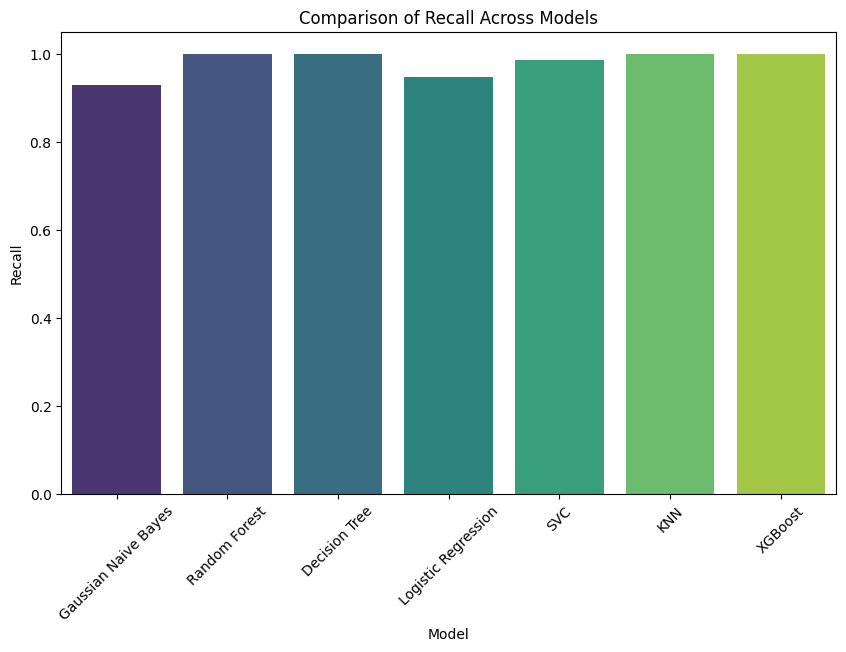

<ipython-input-28-8ee2f3c6c7e1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




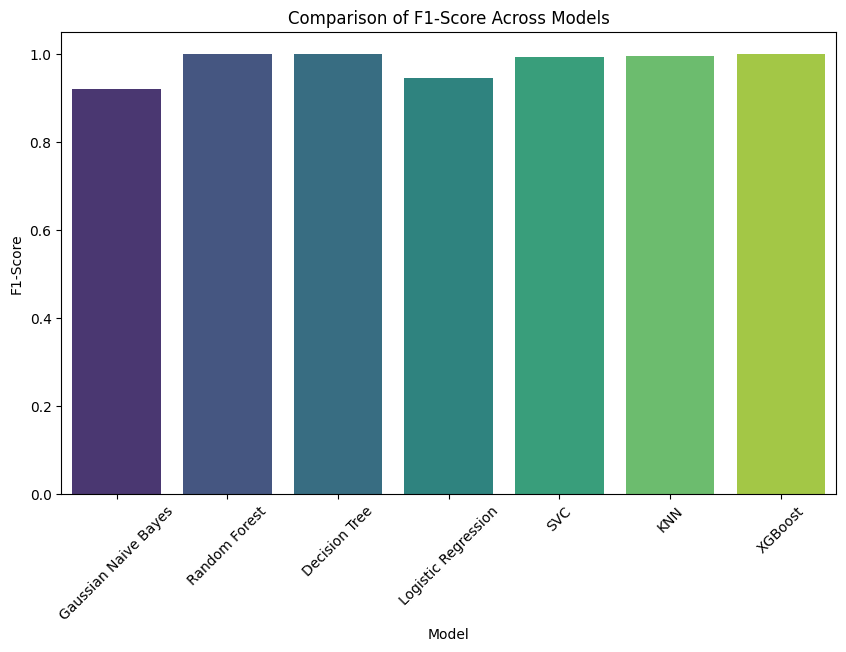

In [28]:
# Displaying the performance metrices
print(results_df)

# Visualizing performance metrices for comparing
import matplotlib.pyplot as plt

# Plotting Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
    plt.title(f'Comparison of {metric} Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models
models = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-score
GaussianNB,0.921846,0.909887,0.929668,0.919671
RandomForest,1.000000,1.000000,1.000000,1.000000
DecisionTree,1.000000,1.000000,1.000000,1.000000
LogisticRegression,0.947692,0.943949,0.947570,0.945756
SVC,0.992615,0.998705,0.985934,0.992278
KNN,0.996308,0.992386,1.000000,0.996178
XGBoost,1.000000,1.000000,1.000000,1.000000


In [31]:
best_model = max(results, key=lambda k: results[k]['F1-score'])
print("Best performing model:", best_model)


Best performing model: RandomForest
